** PYTHON PROJECT FOR DATA SCIENCE **

Question 1 - Extracting Tesla Stock Data Using yfinance

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [73]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [83]:
import yfinance as yf

tesla = yf.Ticker("TSLA")


In [84]:
tesla_data = tesla.history(period="max")

In [85]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2 - Extracting Tesla Revenue Data Using Webscraping

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [86]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [87]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Define the URL for Tesla's revenue data
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Custom headers to simulate a real user visit
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# Send a GET request to the URL with the headers
response = requests.get(url, headers=headers)

# Check if we were able to retrieve the page successfully
if response.status_code == 200:
    # Parse the response content with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all text elements that contain the title of the revenue table
    title_elements = soup.find_all(string=re.compile('Tesla Quarterly Revenue'))
    
    # Check if we found the elements
    if title_elements:
        for element in title_elements:
            # Find the parent table of the title element
            table = element.find_parent('table')
            if table:
                break
    
        # If we found the table, we can now parse it
        if table:
            # Initialize an empty list to store the data
            revenue_data = []

            # Extract the rows from the table, skipping the header row
            for row in table.find_all('tr')[1:]:
                # Get all columns for the row
                cols = row.find_all('td')
                if len(cols) >= 2:  # Ensure there are at least two columns for Date and Revenue
                    # Extract text from the first two columns (assuming these are Date and Revenue)
                    date_text = cols[0].get_text(strip=True)
                    revenue_text = cols[1].get_text(strip=True)
                    # Skip the row if revenue_text is empty or null
                    if revenue_text and not revenue_text.isspace():
                        # Append the data as a tuple into the list
                        revenue_data.append((date_text, revenue_text))

            # Create a DataFrame from the list of tuples
            revenue_df = pd.DataFrame(revenue_data, columns=['Quarter Ended', 'Revenue'])

            # Display the tail of the DataFrame
            print(revenue_df.tail())
        else:
            print("Found the title but no associated table.")
    else:
        print("The 'Tesla Quarterly Revenue' title was not found in any text elements.")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


   Quarter Ended Revenue
53    2010-09-30     $31
54    2010-06-30     $28
55    2010-03-31     $21
56    2009-09-30     $46
57    2009-06-30     $27


Question 3 - Extracting GameStop Stock Data Using yfinance

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [88]:
gamestop = yf.Ticker("GME")

In [89]:
gme_data = gme.history(period="max")

In [90]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4 - Extracting GameStop Revenue Data Using Webscraping

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [91]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Define the URL for Gamestop's revenue data
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# Custom headers to simulate a real user visit
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

# Send a GET request to the URL with the headers
response = requests.get(url, headers=headers)

# Check if we were able to retrieve the page successfully
if response.status_code == 200:
    # Parse the response content with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all text elements that contain the title of the revenue table
    title_elements = soup.find_all(string=re.compile('GameStop Quarterly Revenue'))
    
    # Check if we found the elements
    if title_elements:
        for element in title_elements:
            # Find the parent table of the title element
            table = element.find_parent('table')
            if table:
                break
    
        # If we found the table, we can now parse it
        if table:
            # Initialize an empty list to store the data
            revenue_data = []

            # Extract the rows from the table, skipping the header row
            for row in table.find_all('tr')[1:]:
                # Get all columns for the row
                cols = row.find_all('td')
                if len(cols) >= 2:  # Ensure there are at least two columns for Date and Revenue
                    # Extract text from the first two columns (assuming these are Date and Revenue)
                    date_text = cols[0].get_text(strip=True)
                    revenue_text = cols[1].get_text(strip=True)
                    # Skip the row if revenue_text is empty or null
                    if revenue_text and not revenue_text.isspace():
                        # Append the data as a tuple into the list
                        revenue_data.append((date_text, revenue_text))

            # Create a DataFrame from the list of tuples
            revenue_df = pd.DataFrame(revenue_data, columns=['Quarter Ended', 'Revenue'])

            # Display the tail of the DataFrame
            print(revenue_df.tail())
        else:
            print("Found the title but no associated table.")
    else:
        print("The 'Gamestop Quarterly Revenue' title was not found in any text elements.")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


   Quarter Ended Revenue
55    2010-01-31  $3,524
56    2009-10-31  $1,835
57    2009-07-31  $1,739
58    2009-04-30  $1,981
59    2009-01-31  $3,492


Question 5 - Tesla Stock and Revenue Dashboard

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

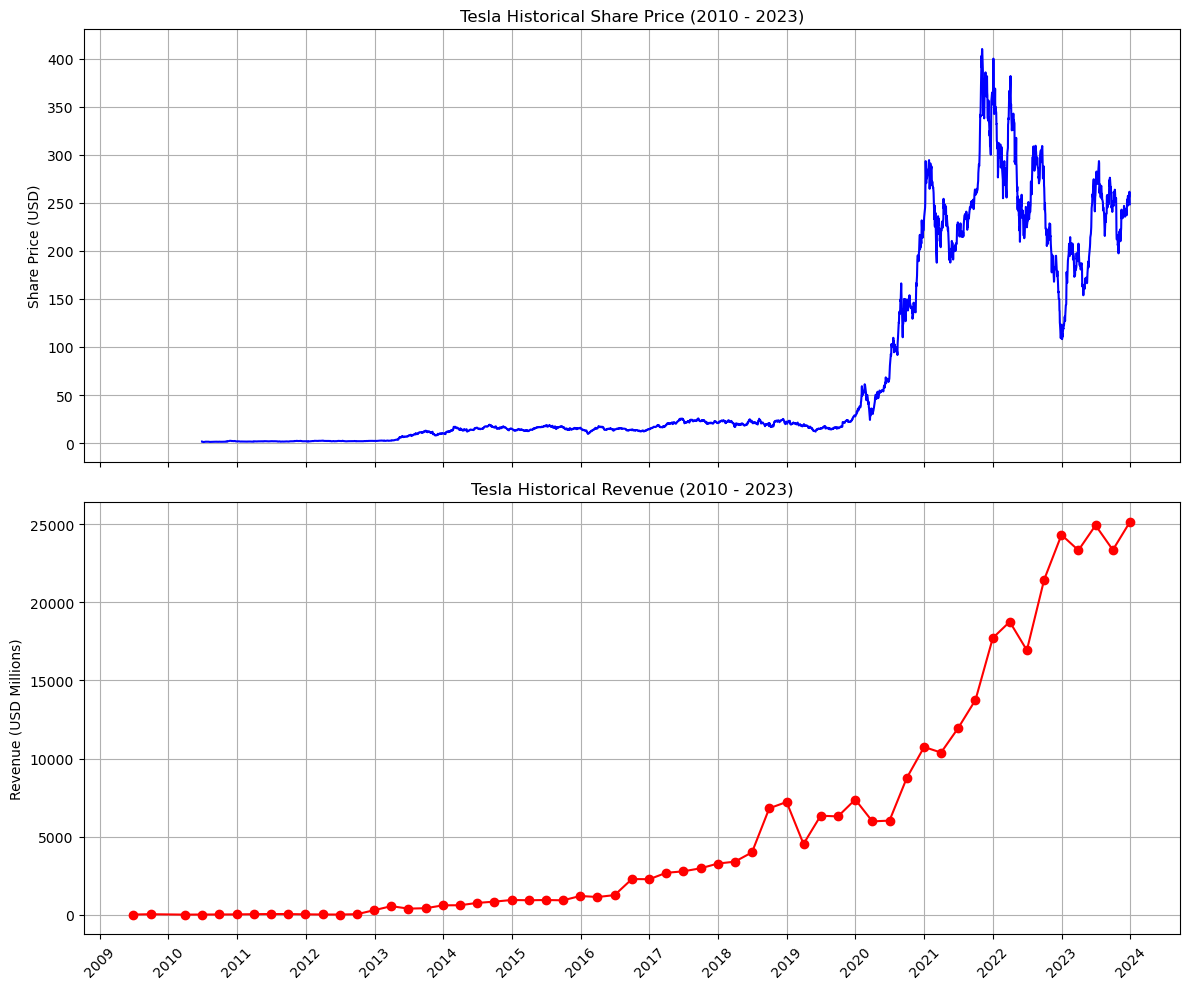

In [92]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import re

# Snippet 1: Retrieve Tesla's historical stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(start="2010-01-01", end="2024-01-01")
tesla_data.reset_index(inplace=True)

# Snippet 2: Retrieve Tesla's revenue data
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')
revenue_data = []

if response.status_code == 200:
    title_elements = soup.find_all(string=re.compile('Tesla Quarterly Revenue'))
    if title_elements:
        for element in title_elements:
            table = element.find_parent('table')
            if table:
                break
        if table:
            for row in table.find_all('tr')[1:]:
                cols = row.find_all('td')
                if len(cols) >= 2:
                    date_text = cols[0].get_text(strip=True)
                    revenue_text = cols[1].get_text(strip=True)
                    revenue_data.append((date_text, revenue_text))

revenue_df = pd.DataFrame(revenue_data, columns=['Quarter Ended', 'Revenue'])
revenue_df['Quarter Ended'] = pd.to_datetime(revenue_df['Quarter Ended'])
revenue_df['Revenue'] = pd.to_numeric(revenue_df['Revenue'].str.replace('[^\d.]', '', regex=True), errors='coerce')
revenue_df = revenue_df.dropna()

# Proceed to plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plotting Tesla's historical share price
axs[0].plot(tesla_data['Date'], tesla_data['Close'], color='blue')
axs[0].set_ylabel('Share Price (USD)')
axs[0].set_title('Tesla Historical Share Price (2010 - 2023)')
axs[0].grid(True)

# Plotting Tesla's historical revenue
axs[1].plot(revenue_df['Quarter Ended'], revenue_df['Revenue'], color='red', marker='o', linestyle='-')
axs[1].set_ylabel('Revenue (USD Millions)')
axs[1].set_title('Tesla Historical Revenue (2010 - 2023)')
axs[1].grid(True)

# Improve date formatting and layout
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Question 6 - GameStop Stock and Revenue Dashboard

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

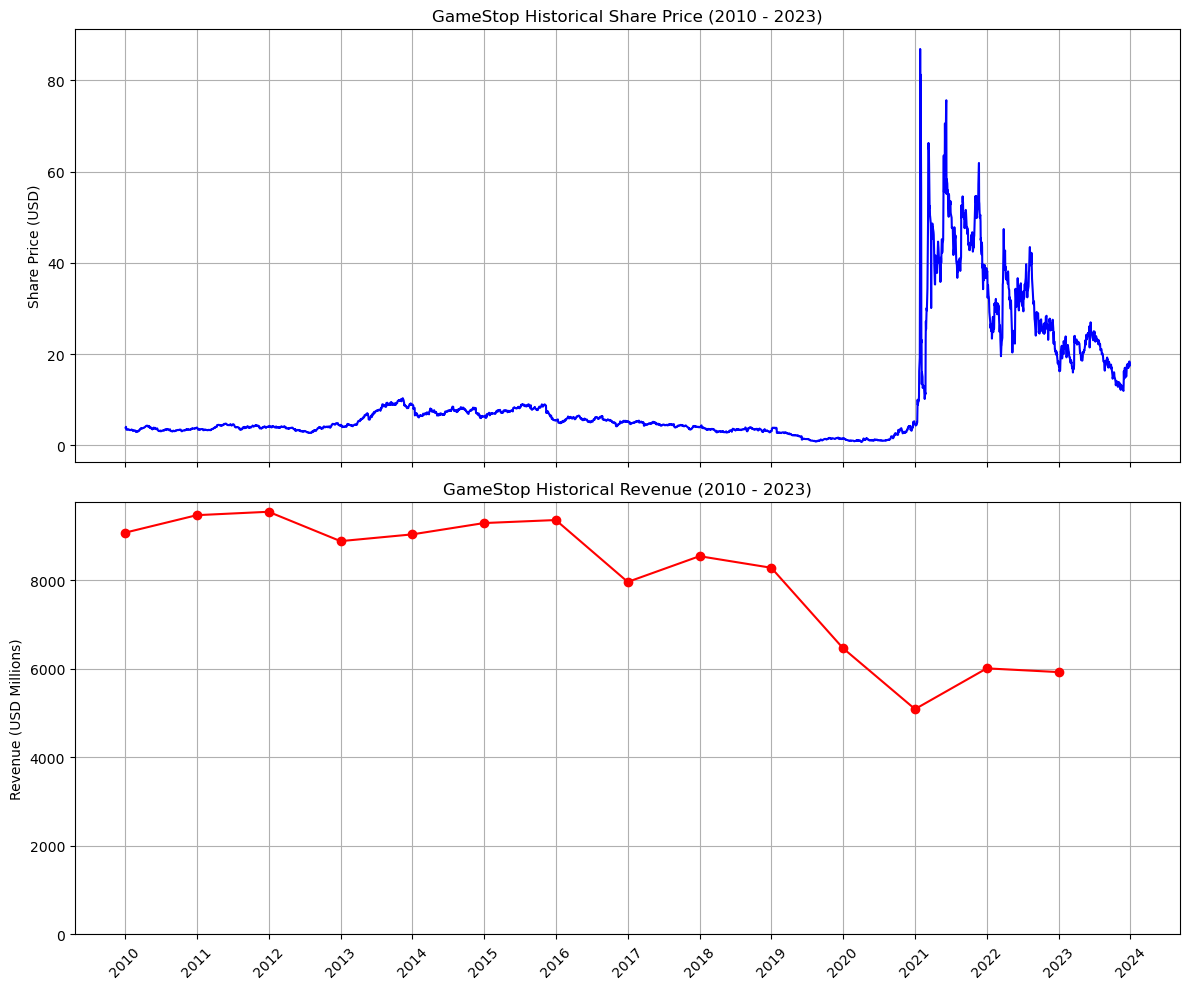

In [98]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import re

# Retrieve GameStop's historical stock data
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(start="2010-01-01", end="2024-01-01")
gme_data.reset_index(inplace=True)

# Retrieve GameStop's revenue data
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response = requests.get(url, headers=headers)

revenue_data = []
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table')
    for row in table.find_all('tr')[1:]:
        cols = row.find_all('td')
        if len(cols) >= 2:
            date_text = cols[0].text.strip()
            revenue_text = cols[1].text.strip()
            revenue_data.append((date_text, revenue_text))

revenue_df = pd.DataFrame(revenue_data, columns=['Quarter Ended', 'Revenue'])

# Ensure 'Quarter Ended' is in datetime format and 'Revenue' is treated as a string and then converted to numeric
revenue_df['Quarter Ended'] = pd.to_datetime(revenue_df['Quarter Ended'])
revenue_df['Revenue'] = revenue_df['Revenue'].astype(str)
revenue_df['Revenue'] = pd.to_numeric(revenue_df['Revenue'].str.replace(r'[^\d.]', '', regex=True), errors='coerce')
revenue_df.dropna(subset=['Revenue'], inplace=True)

# Filter both DataFrames for the date range from 2010 through 2023
gme_data = gme_data[(gme_data['Date'].dt.year >= 2010) & (gme_data['Date'].dt.year <= 2023)]
revenue_df = revenue_df[(revenue_df['Quarter Ended'].dt.year >= 2010) & (revenue_df['Quarter Ended'].dt.year <= 2023)]

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plotting GameStop's historical share price
axs[0].plot(gme_data['Date'], gme_data['Close'], color='blue')
axs[0].set_ylabel('Share Price (USD)')
axs[0].set_title('GameStop Historical Share Price (2010 - 2023)')
axs[0].grid(True)

# Plotting GameStop's historical revenue
axs[1].plot(revenue_df['Quarter Ended'], revenue_df['Revenue'], color='red', marker='o', linestyle='-')
axs[1].set_ylabel('Revenue (USD Millions)')
axs[1].set_title('GameStop Historical Revenue (2010 - 2023)')
axs[1].grid(True)

# Setting the y-axis of the revenue plot to start at 0
axs[1].set_ylim(bottom=0)

# Improve date formatting and layout
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Question 7 - Sharing your Assignment Notebook

Add the GitHub link or the URL to your assignment in Watson Studio using the share notebook lab instructions.